# Neural Network : Part-1  Building No Hidden Layer Image Classifier 
- 2-class classification neural network without hidden layer 

## Neural Network model

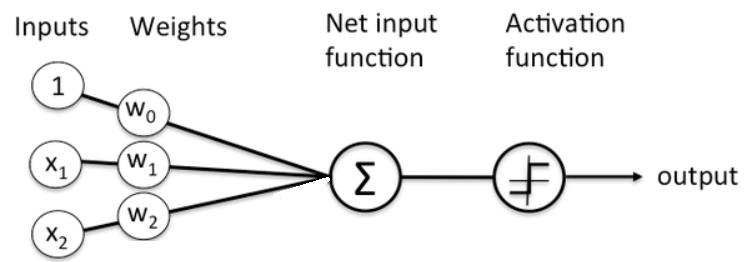

### Defining the neural network structure 
**Mathematically**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b $$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{n} \sum_{i=1}^n \mathcal{L}(a^{(i)}, y^{(i)})$$



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
import imageio
from datetime import datetime

from matplotlib.colors import ListedColormap
from sklearn.datasets import make_circles

## Parts of algorithm ## 

The main steps for building a Neural Network are:
1. Define the model structure (such as number of input features) 
2. Initialize the model's parameters
3. Loop:
    - Calculate current loss (forward propagation)
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)

You often build 1-3 separately and integrate them into one function we call `model()`.

# Building Neural Network Model

In [2]:
def initialize_with_zeros(dim):
    W = np.random.randn(dim, 1) * 0.01
    b = 0.0
    
    
    parameters={"W":W,"b":b}
    
    return parameters

###  Sigmoid function

 $$sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$$ 

In [3]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

## Propagation

### Forward Propagation

- compute $$A = \sigma(w^T X + b) = (a^{(0)}, a^{(1)}, ..., a^{(n-1)}, a^{(n)})$$
- calculate the cost function: $$J = -\frac{1}{n}\sum_{i=1}^{n}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$$

In [4]:
def forward_propagate(X,parameters):
    W=parameters["W"]
    b=parameters["b"]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    # compute activation
    A = sigmoid(np.dot(W.T,X) + b) 
    
    return A
    

## Cost/Loss function
 Compute the cross-entropy cost $J$, using the following formula: $$-\frac{1}{n} \sum\limits_{i = 1}^{n} (Y\log\left(A\right) + (1-Y)\log\left(1- A\right)) $$

In [5]:
def compute_cost(A, Y):   
    n = Y.shape[1]
    cost = (-1/n) * np.sum( np.dot(Y, np.log(A).T) + np.dot((1-Y), np.log(1-A).T) )
    cost = np.squeeze(cost)
    return cost

### Backward Propagation

- compute$$\frac{\partial J}{\partial w} = \frac{1}{n}X(A-Y)^T$$
- compute $$\frac{\partial J}{\partial b} = \frac{1}{n} \sum_{i=1}^n (a^{(i)}-y^{(i)})$$

In [6]:
def backward_propagate(A, X, Y):
    n = Y.shape[1]
    db = (1/n) * (np.sum(A-Y))
   
    dW = (1/n)*(np.dot(X,np.subtract(A,Y).T))

    grads = {"dW": dW,
             "db": db}
    
    return grads

### Gradient Descent Updates
- You have initialized your parameters.
- You are also able to compute a cost function and its gradient.
- Now, you want to update the parameters using gradient descent.
The goal is to learn $W$ and $b$ by minimizing the cost function $J$. 
<p>For a parameter $W$ and $b$, the update rule is 
<p>
$$ W = W - \alpha \text{ } dW$$  
$$ b = b - \alpha \text{ } db$$  
<p>where $\alpha$ is the learning rate.

In [7]:
def update_parameters(parameters, grads, learning_rate):
    W=parameters["W"]
    b=parameters["b"]
    W = W - learning_rate * grads["dW"]
    b = b - learning_rate * grads["db"] 
    parameters["W"]=W
    parameters["b"]=b
    return parameters

## Model

In [8]:
def model(X, Y, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    parameters = initialize_with_zeros(X.shape[0])
    costs = []
    
    for i in range(num_iterations):
        
        A=forward_propagate(X,parameters)
        
        cost=compute_cost(A, Y)
        
        grads=backward_propagate(A, X, Y)
       
        
        parameters=update_parameters(parameters, grads, learning_rate)
        
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
            
    parameters["costs"]=costs
    parameters["learning_rate"]=learning_rate
    
    return parameters
    

### Prediction

1. Calculate $$ A = \sigma(w^T X + b)$$


2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector $Y_{prediction}$. 

$$Y_{prediction} =\hat{Y}= \mathbb 1 \text{{activation > 0.5}} = \begin{cases}
      1 & \text{if}\ activation > 0.5 \\
      0 & \text{otherwise}
    \end{cases}$$  

In [9]:
def predict(X, myModel):
    n = X.shape[1]
    parameters = dict(myModel)
    del parameters["costs"]
    del parameters["learning_rate"]
   
    yhat = np.zeros((1,n))
        
        
    # Retrieve each parameter from the dictionary "parameters"
    W = parameters["W"]
    b = parameters["b"]
      
    W = W.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    A = sigmoid(np.dot(W.T,X) + b)
   
    for i in range(A.shape[1]):
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if (A[0,i] <=0.5):
            yhat[0,i] = 0
        elif (A[0,i] > 0.5):
            yhat[0,i] = 1
        pass
    
    return yhat

# Training

In [45]:
X,Y=make_circles(noise=0.3, factor=0.2, random_state=1)

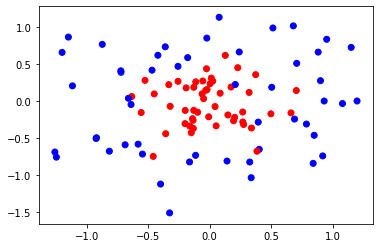

In [46]:
cmap = ListedColormap(['blue', 'red']) 
plt.scatter(X[:, 0].flatten(), X[:, 1].flatten(), c=Y.flatten(), cmap=cmap);
plt.show()

## Standardize our dataset

In [52]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
XS=SS.fit_transform(X)
Y=Y.reshape(len(Y.flatten()),1)


### Train model

In [53]:
tic = datetime.now()
myModel = model(XS.T, Y.T, num_iterations = 5000, learning_rate = 0.005, print_cost = True)
toc = datetime.now()
print ("Traning time = " + str((toc - tic).total_seconds()) + " Seconds ")

Cost after iteration 0: 0.693076
Cost after iteration 100: 0.693073
Cost after iteration 200: 0.693071
Cost after iteration 300: 0.693069
Cost after iteration 400: 0.693068
Cost after iteration 500: 0.693067
Cost after iteration 600: 0.693066
Cost after iteration 700: 0.693065
Cost after iteration 800: 0.693065
Cost after iteration 900: 0.693064
Cost after iteration 1000: 0.693064
Cost after iteration 1100: 0.693064
Cost after iteration 1200: 0.693063
Cost after iteration 1300: 0.693063
Cost after iteration 1400: 0.693063
Cost after iteration 1500: 0.693063
Cost after iteration 1600: 0.693063
Cost after iteration 1700: 0.693063
Cost after iteration 1800: 0.693063
Cost after iteration 1900: 0.693063
Cost after iteration 2000: 0.693063
Cost after iteration 2100: 0.693063
Cost after iteration 2200: 0.693063
Cost after iteration 2300: 0.693063
Cost after iteration 2400: 0.693063
Cost after iteration 2500: 0.693063
Cost after iteration 2600: 0.693063
Cost after iteration 2700: 0.693063
Cost

## Plot Learning Curve

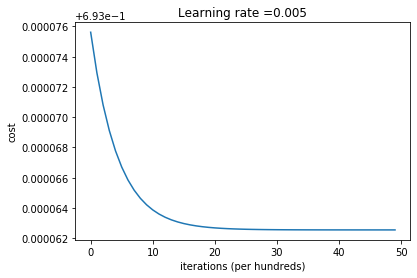

In [54]:
# Plot learning curve (with costs)
costs = np.squeeze(myModel['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(myModel["learning_rate"]))
plt.show()